In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv("/content/airports.csv")

In [ ]:
df.describe()

,id,latitude_deg,longitude_deg,elevation_ft
count,67312.000000,67312.000000,67312.000000,54335.000000
mean,130355.261944,25.945866,-31.136863,1268.620006
std,147216.979862,26.380436,84.227690,1624.730666
min,2.000000,-90.000000,-179.876999,-1266.000000
25%,16962.750000,11.195161,-93.801077,208.000000
50%,36279.500000,35.437555,-70.799722,725.000000
75%,322275.250000,43.035376,18.963488,1558.000000
max,347611.000000,82.750000,179.975700,22000.000000


In [ ]:
df.continent.unique()

array([nan, 'OC', 'AF', 'AN', 'EU', 'AS', 'SA'], dtype=object)

In [ ]:
df=df.replace("no",0)
df=df.replace("yes",1)
#df = df.drop(['continent'],axis=1)
print(df.tail())

           id    ident           type                       name  \
67307   46378  ZZ-0001       heliport            Sealand Helipad   
67308  307326  ZZ-0002  small_airport  Glorioso Islands Airstrip   
67309  346788  ZZ-0003  small_airport      Fainting Goat Airport   
67310  342102     ZZZW         closed     Scandium City Heliport   
67311  313629     ZZZZ  small_airport     Satsuma Iōjima Airport   

       latitude_deg  longitude_deg  elevation_ft continent iso_country  \
67307     51.894444       1.482500          40.0        EU          GB   
67308    -11.584278      47.296389          11.0        AF          TF   
67309     32.110587     -97.356312         690.0       NaN          US   
67310     69.355287    -138.939310           4.0       NaN          CA   
67311     30.784722     130.270556         338.0        AS          JP   

      iso_region         municipality  scheduled_service gps_code iata_code  \
67307     GB-ENG              Sealand                  0      NaN  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


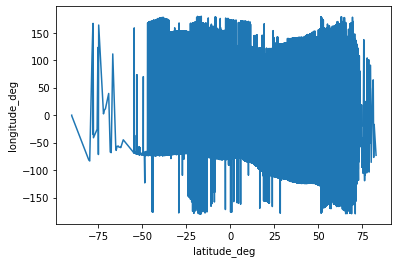

In [ ]:
sns.lineplot(df['latitude_deg'],df['longitude_deg'])
plt.show()

In [ ]:
print(df.shape)
n = len(pd.unique(df['name']))
d=len(pd.unique(df['type']))
print("name",n,"type",d)
df['scheduled_service'].value_counts()


(67312, 18)
name 63826 type 7


0    63228
1     4084
Name: scheduled_service, dtype: int64

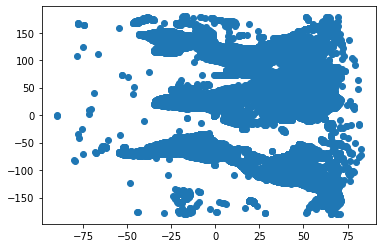

In [ ]:
plt.scatter(x=df['latitude_deg'], y=df['longitude_deg'])
plt.show()

In [ ]:
df=df.replace('NaN',0)
df=df.replace('OC',1)
df=df.replace('AF',2)
df=df.replace('AN',3)
df=df.replace('EU',4)
df=df.replace('AS',5)
df=df.replace('SA',6)
print(df)

           id    ident           type                                name  \
0        6523      00A       heliport                   Total Rf Heliport   
1      323361     00AA  small_airport                Aero B Ranch Airport   
2        6524     00AK  small_airport                        Lowell Field   
3        6525     00AL  small_airport                        Epps Airpark   
4        6526     00AR         closed  Newport Hospital & Clinic Heliport   
...       ...      ...            ...                                 ...   
67307   46378  ZZ-0001       heliport                     Sealand Helipad   
67308  307326  ZZ-0002  small_airport           Glorioso Islands Airstrip   
67309  346788  ZZ-0003  small_airport               Fainting Goat Airport   
67310  342102     ZZZW         closed              Scandium City Heliport   
67311  313629     ZZZZ  small_airport              Satsuma Iōjima Airport   

       latitude_deg  longitude_deg  elevation_ft  continent iso_country  \


In [ ]:
import plotly.express as px
fig = px.scatter_geo(df,lat='latitude_deg',lon='longitude_deg', hover_name="iso_country")
fig.show()

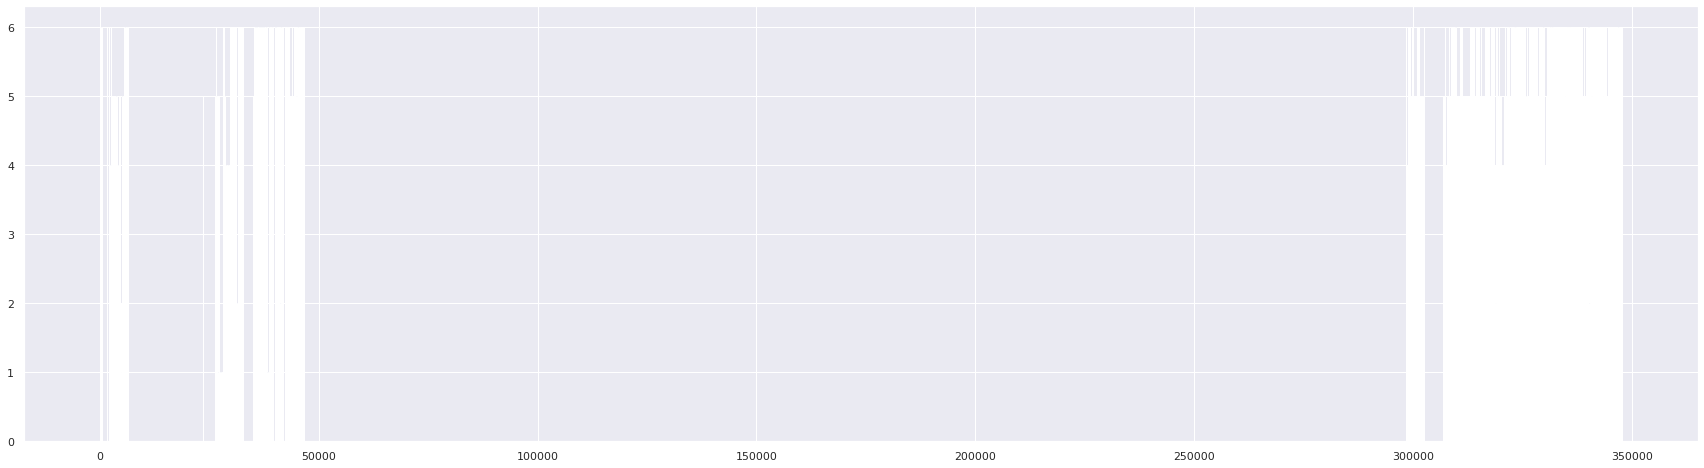

In [ ]:
plt.bar(df['id'],df['continent'])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

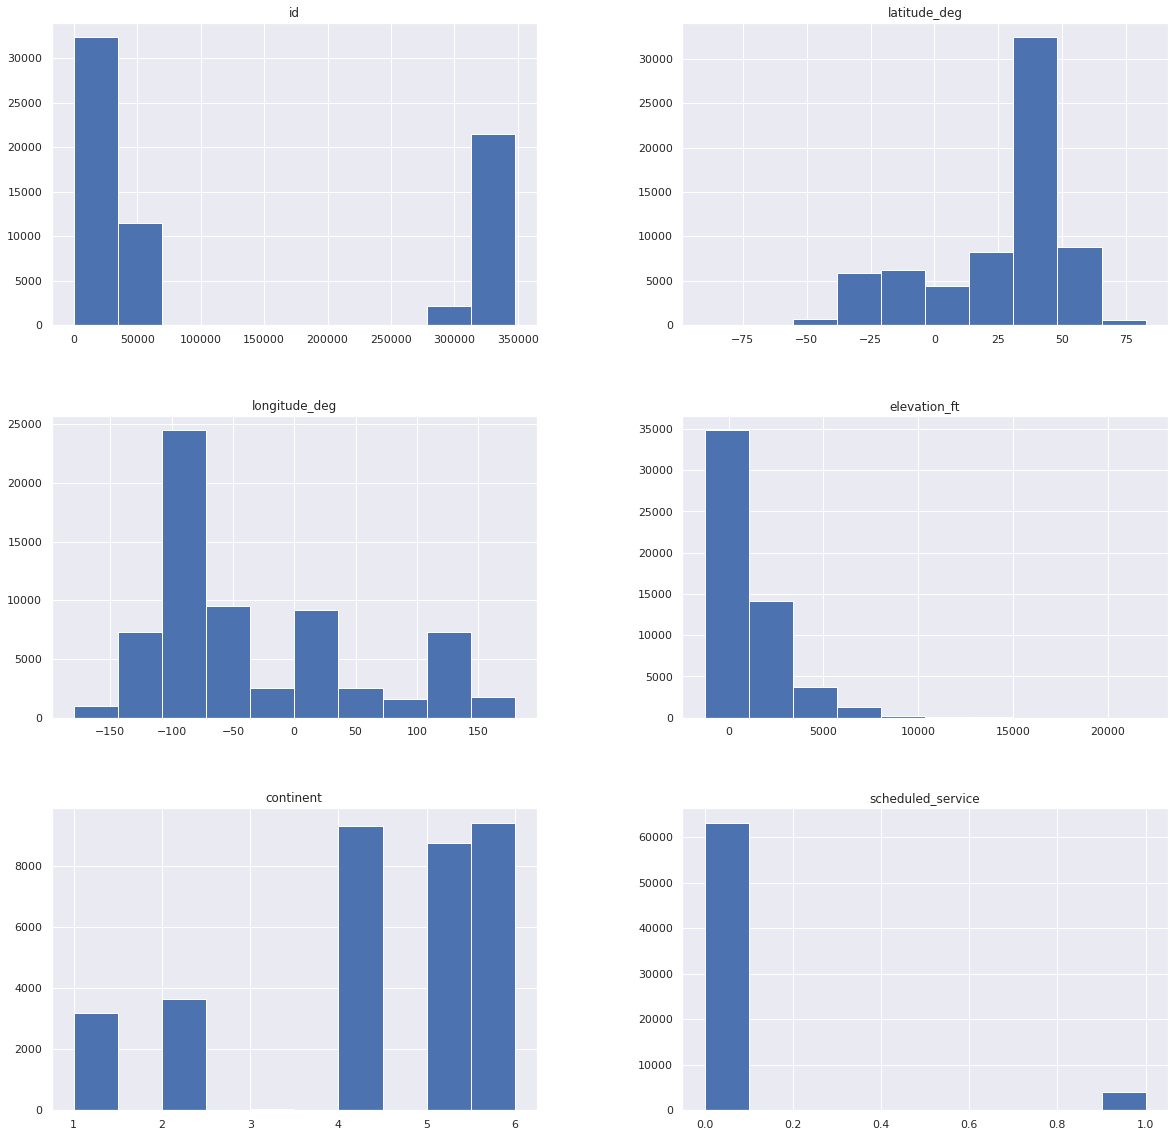

In [25]:
df.hist(figsize=(20,20))
plt.show

,id,latitude_deg,longitude_deg,elevation_ft,continent,scheduled_service
id,1.000000,0.001865,0.260659,0.077109,0.049291,-0.164086
latitude_deg,0.001865,1.000000,-0.232559,-0.098446,0.043923,-0.020139
longitude_deg,0.260659,-0.232559,1.000000,-0.051163,-0.468754,0.135450
elevation_ft,0.077109,-0.098446,-0.051163,1.000000,-0.073561,-0.048313
continent,0.049291,0.043923,-0.468754,-0.073561,1.000000,-0.073231
scheduled_service,-0.164086,-0.020139,0.135450,-0.048313,-0.073231,1.000000


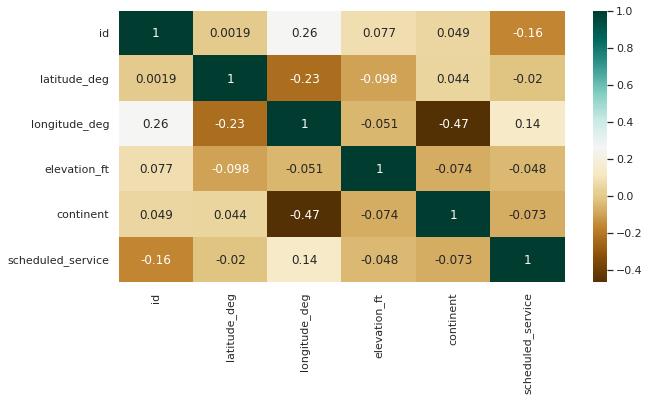

In [26]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c